**Lecturer**

Set up MATLAB

In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eglm03-new-textbook/eglm03-textbook/eglm03-textbook/05/2/matlab'



# Frequency Response Design of a Lag Compensator

This MATLAB Live Script examines the design of phase-lag cascade compensators 
using Bode diagrams.

## Analysis

The plant is a type 1 servomechanism with transfer function:

$$G(s) = \frac{1}{s(s+1)}.$$

The system has unity gain feedback and the compensated closed-loop system is to have a static velocity error constant of 10 and a phase margin of ${45}^{\circ }$.

Defining the system in Matlab 

In [2]:
nG = 1; dG = [1, 1, 0];
G = tf(nG,dG);
H = tf(1,1);
Go = G; 

The first part of the analysis is the same as we went through for the [Lead Compensation case](../1/freqlead) but we repeat the commands so that the code in the MATLAB workspace will be consistent. You should refer to the otherdocument for the detail.

As before, I want to show the uncompensated frequency response diagrams plotted with the asymptotic bode curves and again we use the function |asymp| to achieve this. 

We predefine the frequency values that we want:

In [3]:
w = logspace(-2,1);

Now we calculate the magnitude and phase

In [4]:
[m0,p0] = bode(Go,w);

The result of `|[m0,p0] = bode(Go,w)|` produces a data structure. We need to convert the magnitude to decibels and extract the data into column vectors for plotting.

In [5]:
m0dB = 20*log10(m0);
m0dB = reshape(m0dB,length(w),1);
p0 = reshape(p0,length(w),1);

For the asymptotic magnitude. We need the state space matrices:

In [6]:
[Ao,Bo,Co,Do]=ssdata(Go);

and then the asymptotic response is computed using the function |asymp|:

In [7]:
am0dB = asymp(Ao,Bo,Co,Do,w);

The plots

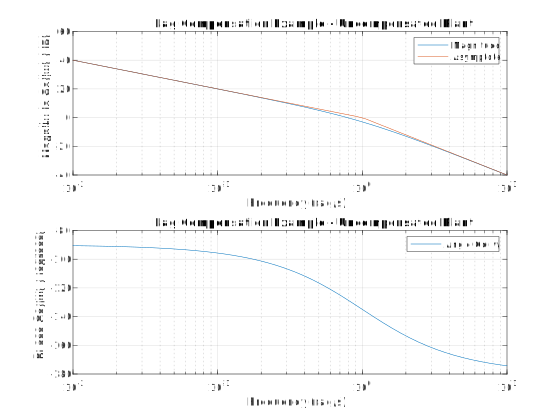

In [8]:
clf
subplot(211)
semilogx(w,m0dB,w,am0dB),...
   axis([0.01, 10, -40, 60]),...
   title('Lag Compensation Example - Uncompensated Plant'),...
   legend('Magnitude','Asymptote'),ylabel('Magnitude Go(jw) (dB)'),xlabel('Frequency (rad/s)'),...
   grid
subplot(212)
semilogx(w,p0),...
   title('Lag Compensation Example - Uncompensated Plant'),...
   legend('Angle Go(jw)'),ylabel('Phase Go(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

The gain cut-off frequency  $\omega_m\approx 1$ rad/s and the phase margin $\phi_m\approx 45^\circ$. Thus the transient performance requirements are already satisfied.

## Lag Compensation for Steady-State Performance

For this system:

$$K_v=\left.sG_o(s)\right|_{s=0}=\left.\frac{1}{s(s+1)}\right|_{s=0}=1$$	 

We want $K_v=10$ so, lag compensation is needed to raise the low frequency gain to 10. The lag compensator has transfer function

$D(s)=K_c\left(\frac{1+Ts}{1+\alpha Ts}\right),\;\alpha>1.$

Examining the frequency response of this compensator we see that

$D(j\omega)=K_c\left(\frac{1+Tj\omega}{1+\alpha Tj\omega}\right).$

The low frequency response is

$$\left.D(j\omega)\right|_{\omega=0}=K_c,$$

and the high frequency response is

$$\left.D(j\omega)\right|_{\omega=\infty}=\frac{K_c}{\alpha}.$$

Since $\alpha >1$, the low frequency gain is higher than the high frequency gain. The problem with a lag compensator is that the price we pay for this increase in the low frequency gain is a phase-lag. To illustrate this, let us take an example system:


Deg =
 
  5 s + 5
  -------
  3 s + 1
 
Continuous-time transfer function.



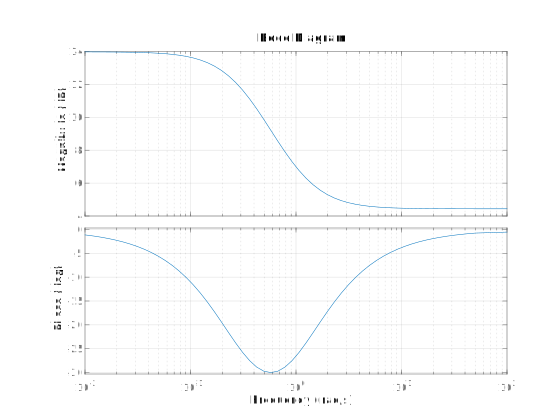

In [9]:
Kc = 5; alpha = 3; T = 1;
Deg = tf(Kc*[T, 1],[alpha*T, 1])  
clf
bode(Deg)
grid

There is a significant phase lag at the centre frequency. We must avoid adding any affects of this lag to the plant transfer<sup>[1]</sup> function at the gain cut-off frequency as this would reduce the phase margin and hence stability. So, we arrange the lag compensator as follows.

The compensator is designed to have unity high frequency gain.

$$\left.D(j\omega)\right|_{\omega=\infty}=\frac{K_c}{\alpha}=1.$$

$$K_c =\alpha.$$

This will avoid any change in the gain cut-off frequency $\omega_1$. The low frequency gain is thus given by 

$$\left.D(j\omega)\right|_{\omega=0}=K_c=\alpha.$$

We also ensure that the lag effect is restricted to the low frequency region: so we make sure that the break-frequency of the zero ($\omega_z = 1/T$) is located at least a decade lower than the gain cut-off frquency $\omega_1$<sup>[2]</sup>. 

Let us set up a lag compensator with these considerations in place.

In [10]:
Kv = 10; w1 = 1; % rad/s
alpha = Kv; % low frequency gain required
Kc = alpha; % compensator gain
wz = w1/10; % 1 decade below gain cut-off
T = 1/wz;   % zero value
D = tf(Kc*[T, 1],[alpha*T, 1])


D =
 
  100 s + 10
  ----------
  100 s + 1
 
Continuous-time transfer function.



We produce a new Bode diagram for the gain compensated system. The same commands are issued as before.

In [11]:
DGo = series(D,Go);
[m1,p1] = bode(DGo,w);
m1dB = 20*log10(m1);
m1dB = reshape(m1dB,length(w),1);
p1 = reshape(p1,length(w),1);

Asymptotic magnitude

In [12]:
[A1,B1,C1,D1]=ssdata(DGo);
am1dB = asymp(A1,B1,C1,D1,w);

Plots

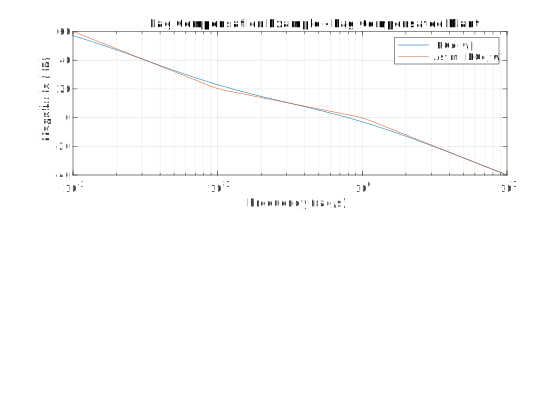

In [13]:
clf
subplot(211)
semilogx(w,m1dB,w,am1dB),...
   axis([0.01, 10, -40, 60]),...
   title('Lag Compensation Example - Lag Compensated Plant'),...
   legend('|DGo(jw)|','Asym. |DGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid

Phase is unchanged

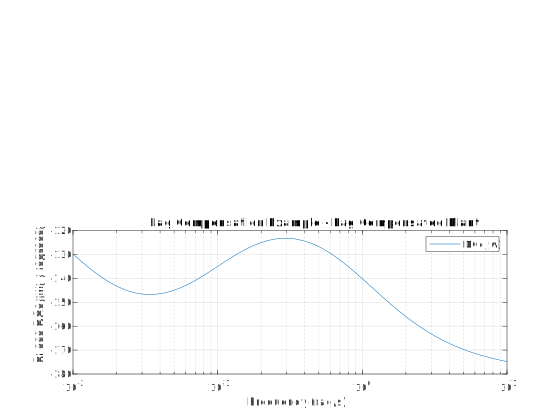

In [14]:
subplot(212)
semilogx(w,p1),...
   title('Lag Compensation Example - Lag Compensated Plant'),...
   legend('DGo(jw)'),ylabel('Phase DGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

How have we done? The low frequency gain has certainly increased by 20 dB (10). What about the phase margin?

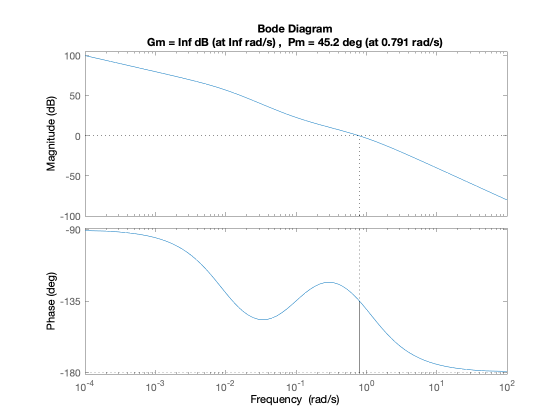

In [15]:
clf
margin(DGo)  

The phase margin is $\phi_m$  and $\omega_1 = 0.79$ rad/s.

## Evaluation of the Design

We now put everything together to evaluate the design. 

### Bode Plots

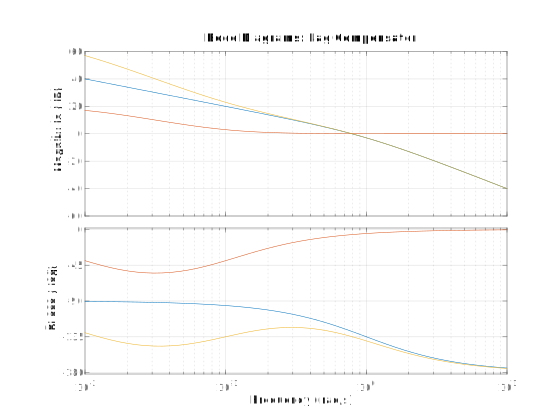

In [16]:
% Bode
%  blue - Uncompensated Go(jw)
%  green - Lag Compensator D(jw)
%  red - Lag compensated DGo(jw)
bode(Go,D,DGo,w),...
   title('Bode Diagrams: Lag Compensator'),...
   grid

### Nyquist Diagrams

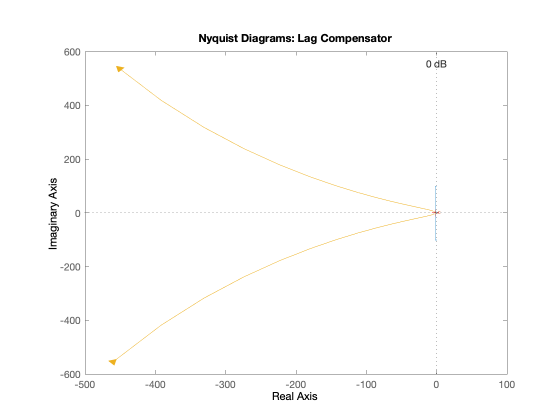

In [17]:
% Nyquist
% blue - Uncompensated Go(jw)
% green - Lag Compensator D(jw)
% red - Lag compensated DGo(jw)
nyquist(Go,D,DGo,w)
   title('Nyquist Diagrams: Lag Compensator'),...
   grid

### Nichols Charts

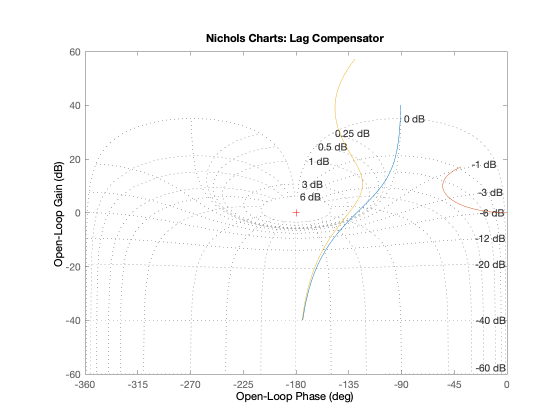

In [18]:
% Nichols
% blue - Uncompensated Go(jw)
% green - Lag Compensator D(jw)
% red - Lag compensated DGo(jw)
nichols(Go,D,DGo,w)
   title('Nichols Charts: Lag Compensator'),...
   grid

### Closed-Loop Frequency Response

Now we examine the closed-loop frequency responses. Notice the slight increase in peak magnification $M_{\mathrm{max}}$.

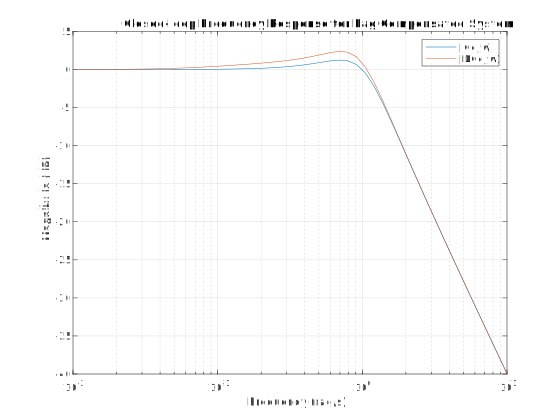

In [19]:
Gc0 = feedback(Go,1);
Gc1 = feedback(DGo,1);
[mc0,pc0]=bode(Gc0,w);
[mc1,pc1]=bode(Gc1,w);
mc0 = 20.*log10(reshape(mc0,length(w),1));
mc1 = 20.*log10(reshape(mc1,length(w),1));
semilogx(w,mc0,w,mc1),...
   grid,...
   title('Closed-loop Frequency Response for Lag Compensated System'),...
   legend('|Go(jw)|','|DGo(jw)|'),...
   xlabel('Frequency (rad/s)'),...
   ylabel('Magnitude (dB)')

### Closed-Loop Step Responses

First we examine the closed-loop step responses. Notice the increase in peak overshoot %OS and the slighly longer settling time.

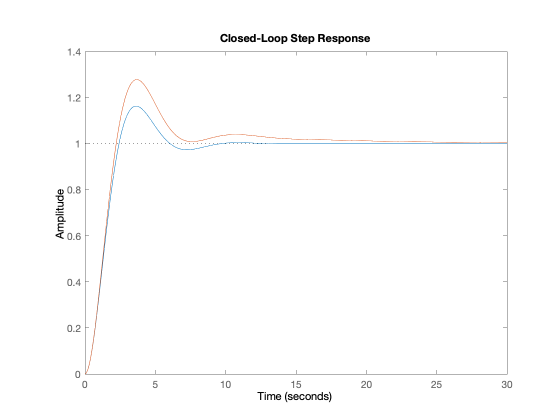

In [20]:
% Blue - uncompensated
% Green - Lag compensated
clf
step(Gc0,Gc1),title('Closed-Loop Step Response')

To compute the ramp error response we need to add an integrator to the error reponse:

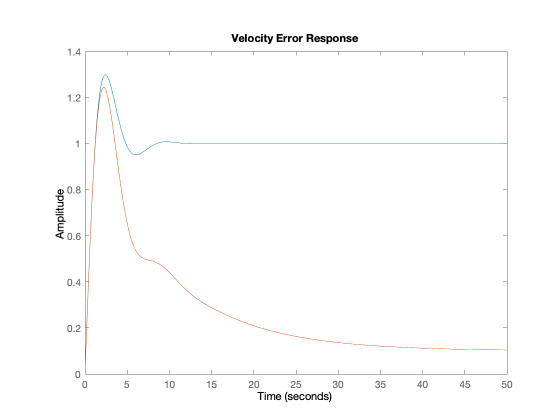

In [21]:
integ=tf(1,[1 0]);
re0 = integ*(1/(1 + Go));
re1 = integ*(1/(1 +DGo));
clf
step(re0,re1), title('Velocity Error Response')

The velocity error is reduced to 10% from 100% showing that $K_v$ is indeed 10. However, note the considerable time taken to reach the final value. This is quite typical of a ramp response response for a lag compensator.

## Footnotes

[1] Or lead compensated plant in a lag-lead compensated system.

[2] The phase lag will then be close to zero at the gain cut-off frequency.

## Resources

An executable version of this document is available to download as a MATLAB Live Script file [freqlag.mlx](matlab/freqlag.mlx) [[asymp.m](matlab/asymp.m)].